# Plotting of Messi's pass map againt Betis

data source : https://github.com/mckayjohns/passmap

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [2]:
df = pd.read_csv('messibetis.csv')

In [3]:
df.head(10)

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38
5,messi,47,42,73,25,Pass,Successful,70,54
6,messi,49,47,75,43,Pass,Unsuccessful,82,38
7,messi,50,10,79,31,Pass,Successful,87,24
8,messi,50,17,82,52,Pass,Successful,93,68
9,messi,50,24,98,62,Pass,Unsuccessful,98,61


As Statsbomb uses a [120,80] pitch, we gonna convert the X and Y values

In [4]:
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8

In [5]:
df.head(10)

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,60.0,40.0,Pass,Successful,48.0,34.4
1,messi,45,25,75.6,38.4,Pass,Successful,90.0,66.4
2,messi,46,4,88.8,46.4,Pass,Successful,85.2,52.0
3,messi,46,7,91.2,54.4,Pass,Successful,114.0,62.4
4,messi,46,55,120.0,0.8,Pass,Unsuccessful,115.2,30.4
5,messi,47,42,87.6,20.0,Pass,Successful,84.0,43.2
6,messi,49,47,90.0,34.4,Pass,Unsuccessful,98.4,30.4
7,messi,50,10,94.8,24.8,Pass,Successful,104.4,19.2
8,messi,50,17,98.4,41.6,Pass,Successful,111.6,54.4
9,messi,50,24,117.6,49.6,Pass,Unsuccessful,117.6,48.8


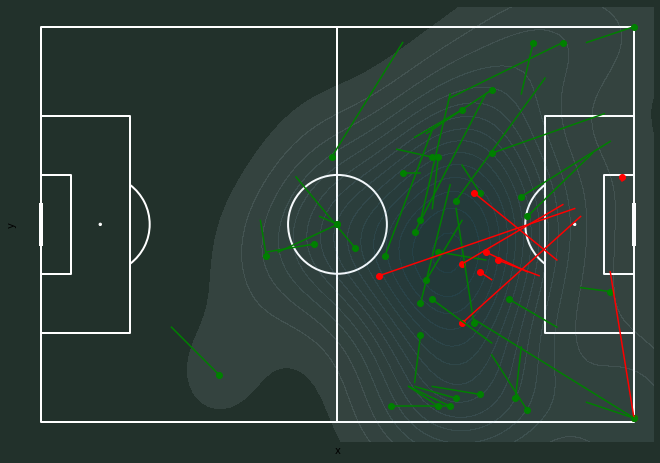

In [14]:
fig,ax = plt.subplots(figsize=(14,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_color='#22312b',line_color='white',stripe=False)
pitch.draw(ax=ax)

# Creating a heat map
kde = sns.kdeplot(df['x'],df['y'],
                  shade=True,
                  shade_lowest=False,
                  alpha=.1,
                  n_levels=15,
                  cnap='magma')



#Invert Y axis
plt.gca().invert_yaxis()

for i in range(len(df['x'])):
    if df['outcome'][i] == "Successful":
        plt.plot((df['x'][i],df['endX'][i]),(df['y'][i],df['endY'][i]),color='green')
        plt.scatter(df['x'][i],df['y'][i],color='green')# to show the origin of the action
    else:
        plt.plot((df['x'][i],df['endX'][i]),(df['y'][i],df['endY'][i]),color='red')
        plt.scatter(df['x'][i],df['y'][i],color='red')# to show the origin of the action